# Introduction to Sklearn for machine learning

## Data handling

### import data

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [2]:
print("Keys of iris_dataset:\n", iris_dataset.keys())

Keys of iris_dataset:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [3]:
X=iris_dataset.data
Y=iris_dataset.target
print("The input has size:", X.shape)
print("The output has size:", Y.shape)

The input has size: (150, 4)
The output has size: (150,)


### data structure

In [4]:
import pandas as pd

# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pd = pd.DataFrame(data)
# IPython.display allows "pretty printing" of dataframes
# in the Jupyter notebook
display(data_pd)

,Age,Location,Name
0,24,New York,John
1,13,Paris,Anna
2,53,Berlin,Peter
3,33,London,Linda


In [5]:
# Select all rows that have an age column greater than 30
data_selection=data_pd[data_pd.Age > 30]
display(data_selection)

,Age,Location,Name
2,53,Berlin,Peter
3,33,London,Linda


### visualize the data

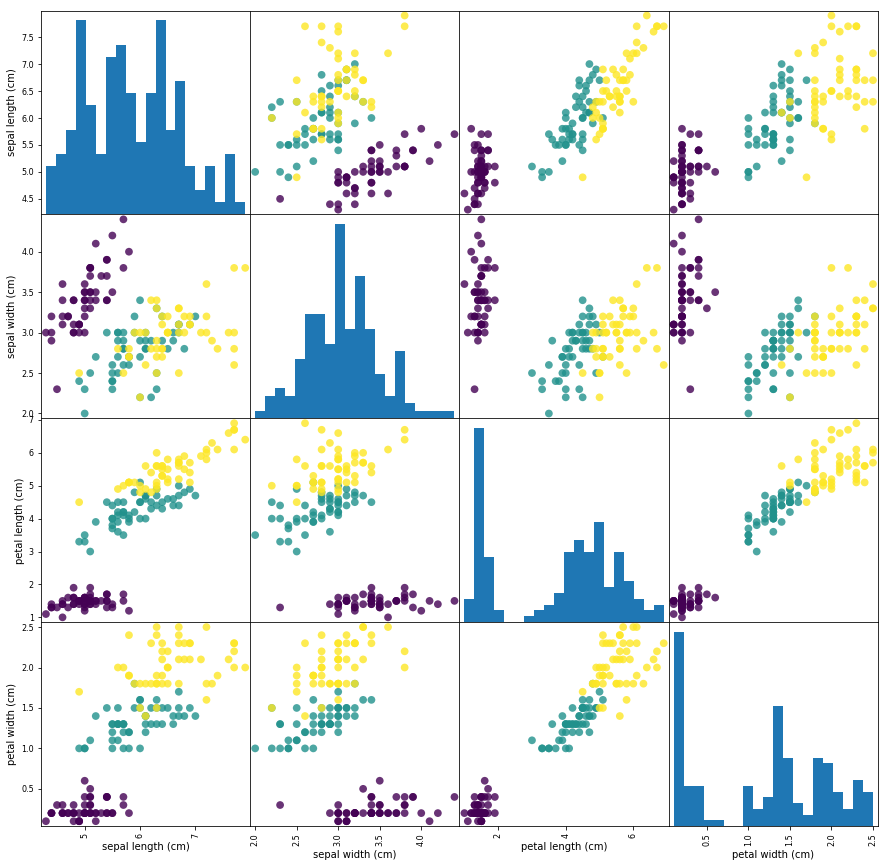

In [6]:

import matplotlib.pyplot as plt
%matplotlib inline

# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=Y, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap='viridis')
plt.show()

# alpha : float, optional
# amount of transparency applied

# figsize : (float,float), optional
# a tuple (width, height) in inches

# ax : Matplotlib axis object, optional
# grid : bool, optional
# setting this to True will show the grid

# diagonal : {‘hist’, ‘kde’}
# pick between ‘kde’ and ‘hist’ for either Kernel Density Estimation or Histogram plot in the diagonal

# marker : str, optional
# Matplotlib marker type, default ‘.’

# hist_kwds : other plotting keyword arguments
# To be passed to hist function

# density_kwds : other plotting keyword arguments
# To be passed to kernel density estimate plot

# range_padding : float, optional
# relative extension of axis range in x and y with respect to (x_max - x_min) or (y_max - y_min), default 0.05

# kwds : other plotting keyword arguments
# To be passed to scatter function

### split training and testing data

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

# test_size : float, int or None, optional (default=None)
# If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.

# train_size : float, int, or None, (default=None)
# If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size.

# random_state : int, RandomState instance or None, optional (default=None)
# If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

# shuffle : boolean, optional (default=True)
# Whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.

# stratify : array-like or None (default=None)
# If not None, data is split in a stratified fashion, using this as the class labels.



In [8]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (100, 4)
y_train shape: (100,)


In [9]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (50, 4)
y_test shape: (50,)


## Machine Learning Methods

### KNN Classification

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Parameters:
# n_neighbors : int, optional (default = 5)
# Number of neighbors to use by default for kneighbors queries.

# Methods

# fit(self, X, y)	Fit the model using X as training data and y as target values
# get_params(self[, deep])	Get parameters for this estimator.
# kneighbors(self[, X, n_neighbors, …])	Finds the K-neighbors of a point.
# kneighbors_graph(self[, X, n_neighbors, mode])	Computes the (weighted) graph of k-Neighbors for points in X
# predict(self, X)	Predict the class labels for the provided data
# predict_proba(self, X)	Return probability estimates for the test data X.
# score(self, X, y[, sample_weight])	Returns the mean accuracy on the given test data and labels.
# set_params(self, \*\*params)	Set the parameters of this estimator.

# __init__(self, n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, 
#  p=2, metric=’minkowski’, metric_params=None, n_jobs=None, **kwargs)



**training**

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

**make predictions**

In [12]:
y_pred = knn.predict(X_test)

**Evaluate the model**

In [13]:
import numpy as np

pred_accuracy=np.mean(y_pred==y_test)
print("The prediction accuracy is: %.2f" % pred_accuracy)

The prediction accuracy is: 0.96


In [14]:
# we can also use the score function in the class
pred_accuracy2=knn.score(X_test, y_test)
print("The prediction accuracy is: %.2f" % pred_accuracy2)

The prediction accuracy is: 0.96


** test for different numbers of neighbours**

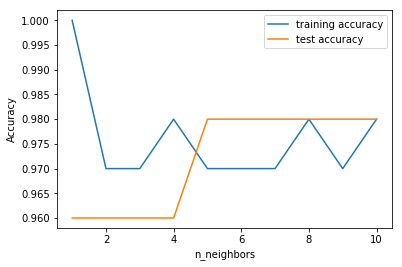

In [15]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn2 = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn2.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn2.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn2.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

### KNN Regression

In [16]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn.datasets import load_boston
boston = load_boston()

X=boston.data
y =boston.target

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [17]:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [ 21.06666667  39.26666667  23.96666667   9.73333333  21.33333333
  21.16666667  21.03333333  27.8         27.4         14.76666667]


In [18]:
print("Test set R^2 is %.2f" %reg.score(X_test, y_test))

Test set R^2 is 0.66


**Evaluation**

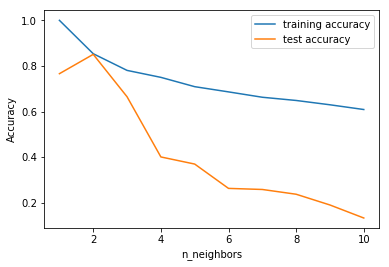

In [19]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_reg.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn_reg.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn_reg.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()
plt.show()

### Linear regression (Least-square)

In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [21]:
# train the model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [ -1.02566156e-01   4.38269307e-02   1.66159237e-02   2.96343890e+00
  -1.70853429e+01   3.84339755e+00  -2.71198104e-03  -1.44047274e+00
   2.92128645e-01  -1.25135403e-02  -9.56088471e-01   9.07968227e-03
  -5.07263707e-01]
lr.intercept_: 36.1211532172


In [23]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.75
Test set score: 0.29


**Ridge regression**

In [24]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.75
Test set score: 0.27


In [25]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.74
Test set score: 0.26


In [26]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.75
Test set score: 0.29


**Lasso regression**

In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.69
Test set score: 0.25
Number of features used: 10


In [28]:
lasso001 = Lasso(alpha=0.01, max_iter=1000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.75
Test set score: 0.28
Number of features used: 13


In [29]:
lasso10 = Lasso(alpha=10, max_iter=1000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso10.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso10.coef_ != 0))

Training set score: 0.53
Test set score: -0.00
Number of features used: 4


### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [32]:
# test for different regularization parameters

In [33]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


In [35]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


In [36]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


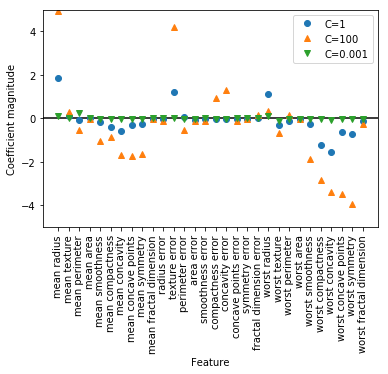

In [37]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

In [38]:
# test for l1 penalty

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


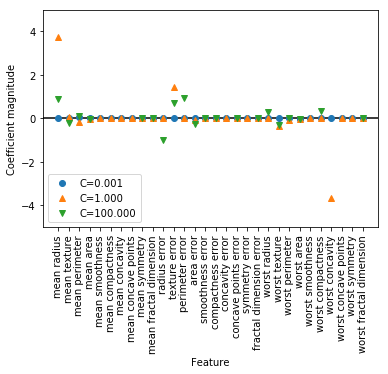

In [39]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

### SVM

In [40]:
from sklearn.svm import LinearSVC

In [41]:
linear_svm = LinearSVC()
linear_svm.fit(X_train, y_train)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)
print("Training set score: {:.3f}".format(linear_svm.score(X_train, y_train)))
print("Test set score: {:.3f}".format(linear_svm.score(X_test, y_test)))

Coefficient shape:  (1, 30)
Intercept shape:  (1,)
Training set score: 0.934
Test set score: 0.937


In [42]:
linear_svm100 = LinearSVC(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(linear_svm100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(linear_svm100.score(X_test, y_test)))

Training set score: 0.923
Test set score: 0.916


In [43]:
linear_svm001 = LinearSVC(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(linear_svm001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(linear_svm001.score(X_test, y_test)))

Training set score: 0.930
Test set score: 0.930


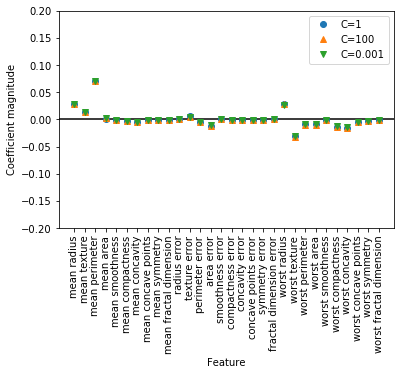

In [44]:
plt.plot(linear_svm.coef_.T, 'o', label="C=1")
plt.plot(linear_svm100.coef_.T, '^', label="C=100")
plt.plot(linear_svm001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-0.2, 0.2)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

### Mutlti-class classification

In [82]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, centers =3, cluster_std=2.60,random_state=42)

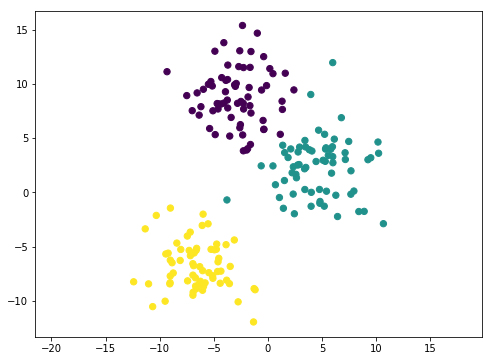

In [83]:
plt.figure(figsize=(8, 6))
ax=plt.subplot(111)
ax.axis('equal')
ax.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='viridis');

In [47]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


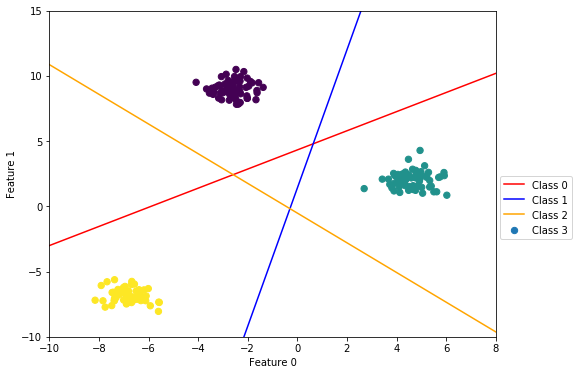

In [48]:
plt.figure(figsize=(8, 6))
ax=plt.subplot(111)
# ax.axis('equal')
ax.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='viridis');

line = np.linspace(-10, 10)
colors=np.array(['red','blue','orange','black'])
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  colors):
    ax.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Line class 0', 'Line class 1',
            'Line class 2', 'Line class 3'], loc=(1.01, 0.3))
plt.show()

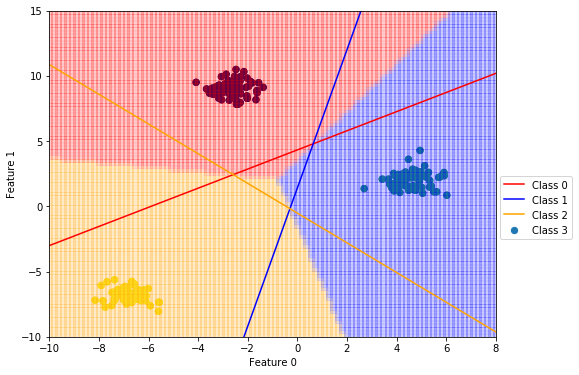

In [49]:
# display the separation boundary

# Create a grid for visualization purposes 
x_g = np.linspace(-10,8,100)
y_g = np.linspace(-10,15,100)
X_,Y_ = np.meshgrid(x_g,y_g)
pos = np.array([X_.flatten(),Y_.flatten()]).T

y_pos=linear_svm.predict(pos)

plt.figure(figsize=(8, 6))
ax=plt.subplot(111)
# ax.axis('equal')
ax.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='viridis');

line = np.linspace(-10, 10)
colors=np.array(['red','blue','orange','black'])
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  colors):
    ax.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Line class 0', 'Line class 1',
            'Line class 2', 'Line class 3'], loc=(1.01, 0.3))

ax.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='viridis');
ax.scatter(pos[:,0], pos[:,1], c=colors[y_pos.astype(int)], alpha=0.1, marker='s')
plt.show()


In [50]:
logistic = LogisticRegression(C=0.1)

In [51]:
logistic.fit(X, y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
logistic.coef_

array([[-0.61849523,  0.87145792],
       [ 0.99004735, -0.21471072],
       [-0.5113496 , -0.68977047]])

In [53]:
logistic.intercept_

array([ -1.14039627e+00,  -3.46951324e-04,  -1.87001934e-01])

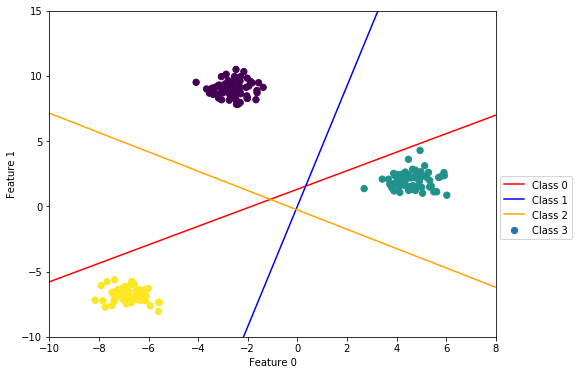

In [54]:
plt.figure(figsize=(8, 6))
ax=plt.subplot(111)
# ax.axis('equal')
ax.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='viridis');

line = np.linspace(-10, 10)
colors=np.array(['red','blue','orange','black'])
for coef, intercept, color in zip(logistic.coef_, logistic.intercept_,
                                  colors):
    ax.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Line class 0', 'Line class 1',
            'Line class 2', 'Line class 3'], loc=(1.01, 0.3))
plt.show()

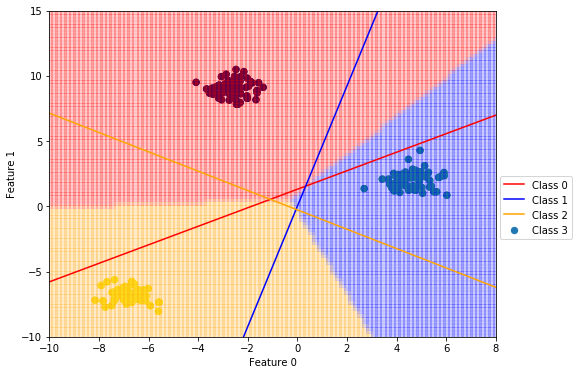

In [55]:
# display the separation boundary

# Create a grid for visualization purposes 
x_g = np.linspace(-10,8,100)
y_g = np.linspace(-10,15,100)
X_,Y_ = np.meshgrid(x_g,y_g)
pos = np.array([X_.flatten(),Y_.flatten()]).T

y_pos=logistic.predict(pos)

plt.figure(figsize=(8, 6))
ax=plt.subplot(111)
# ax.axis('equal')
ax.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='viridis');

line = np.linspace(-10, 10)
colors=np.array(['red','blue','orange','black'])
for coef, intercept, color in zip(logistic.coef_, logistic.intercept_,
                                  colors):
    ax.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Line class 0', 'Line class 1',
            'Line class 2', 'Line class 3'], loc=(1.01, 0.3))

ax.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='viridis');
ax.scatter(pos[:,0], pos[:,1], c=colors[y_pos.astype(int)], alpha=0.1, marker='s')
plt.show()

### PCA

In [56]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


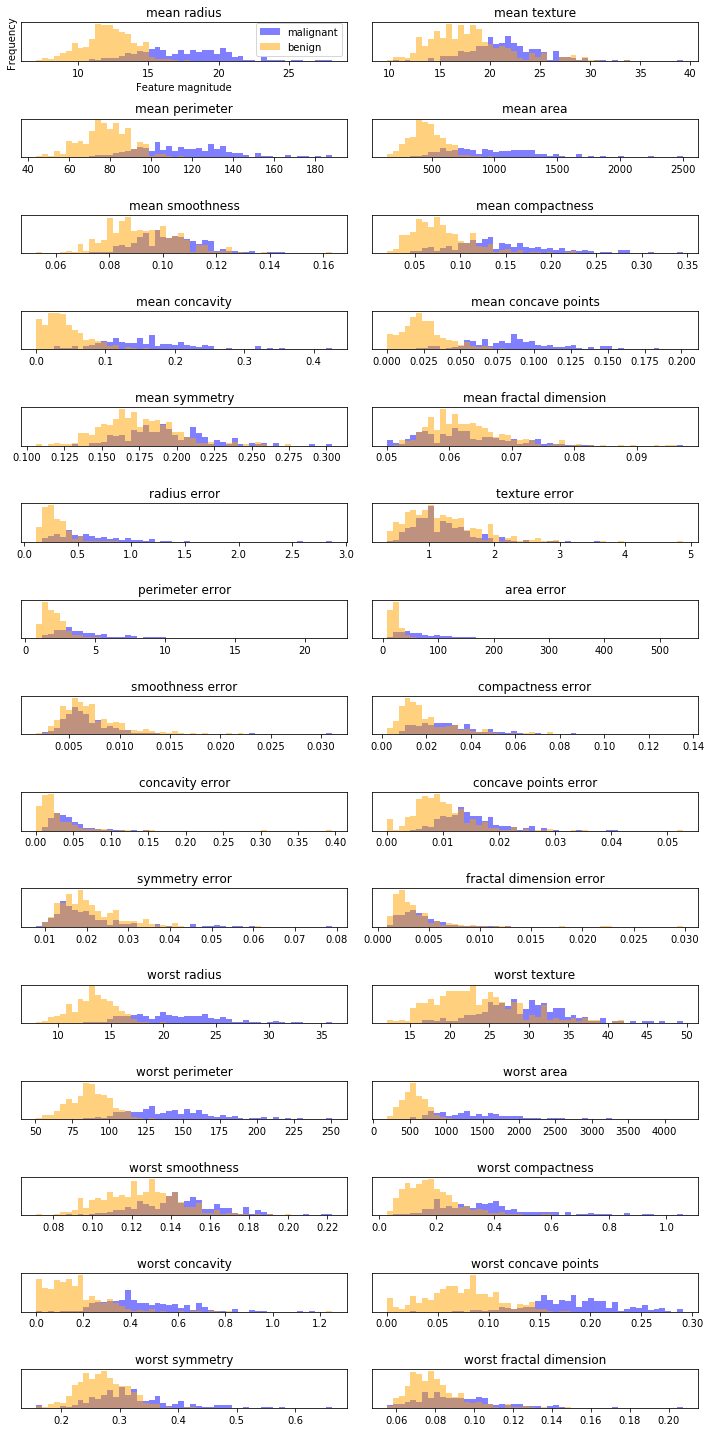

In [57]:
# visualize the data
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='blue', alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color='orange', alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [58]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_train_scaled)

# transform data onto the first two principal components
X_train_pca = pca.transform(X_train_scaled)
print("Original shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_train_pca.shape)))

Original shape: (426, 30)
Reduced shape: (426, 2)


Text(0,0.5,'Second principal component')

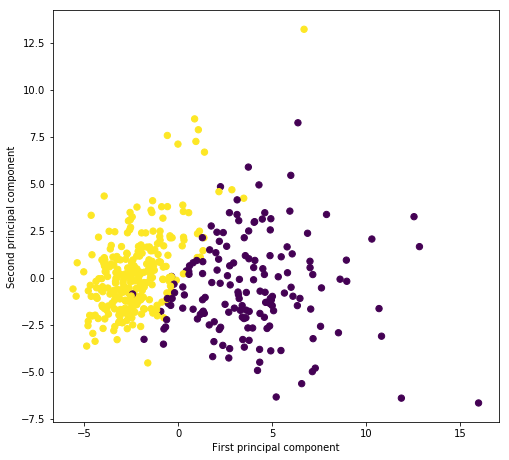

In [60]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
ax=plt.subplot(111)
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=40, cmap='viridis')

plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0,0.5,'Principal components')

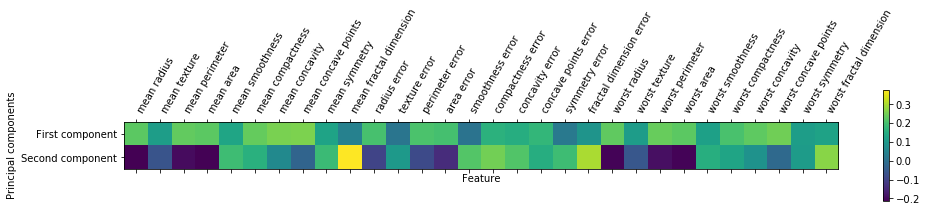

In [61]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

**Eigenfaces for feature extraction**

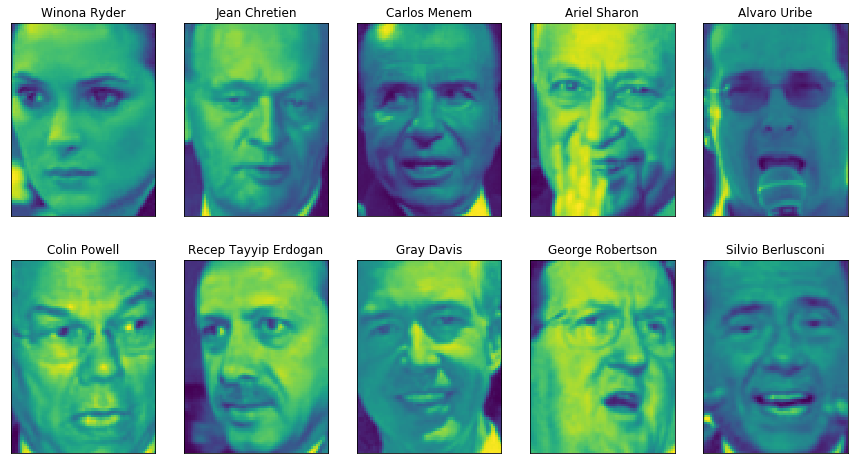

In [62]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [63]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [64]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

In [65]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grey-scale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability:
X_people = X_people / 255.

In [66]:
from sklearn.neighbors import KNeighborsClassifier
# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


In [67]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [68]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


In [69]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


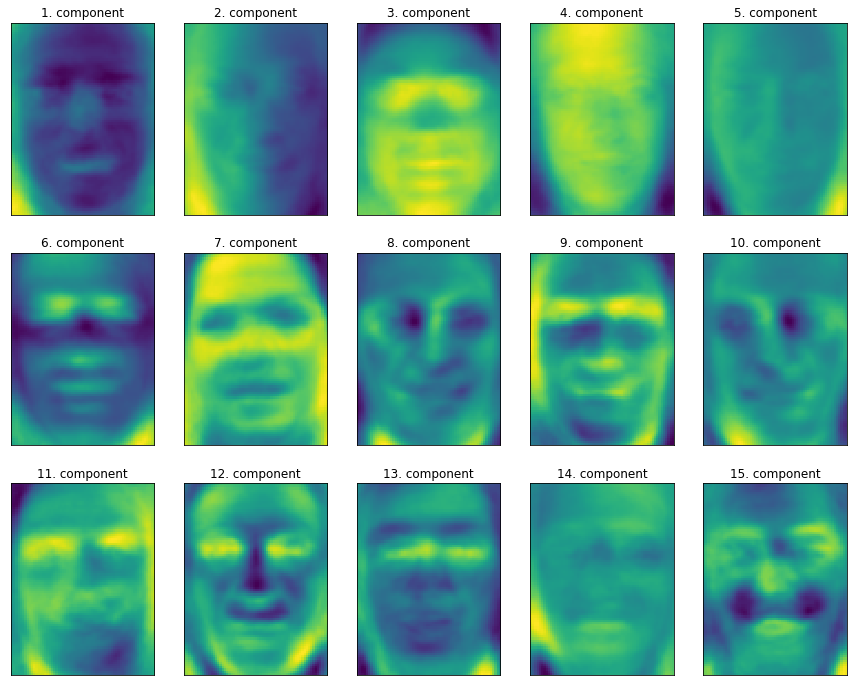

In [70]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

### K-means Clustering

In [71]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(n_samples=200, centers =3, cluster_std=0.60,random_state=1)


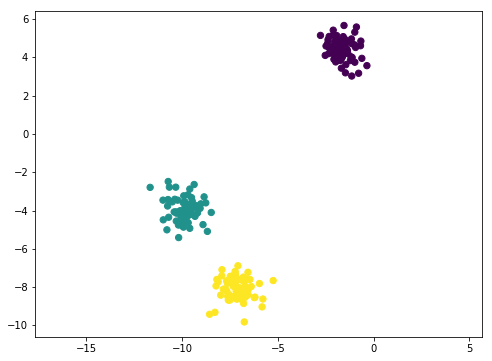

In [72]:
plt.figure(figsize=(8, 6))
ax=plt.subplot(111)
ax.axis('equal')
ax.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='viridis');

In [73]:
# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [74]:
y_pred=kmeans.predict(X)

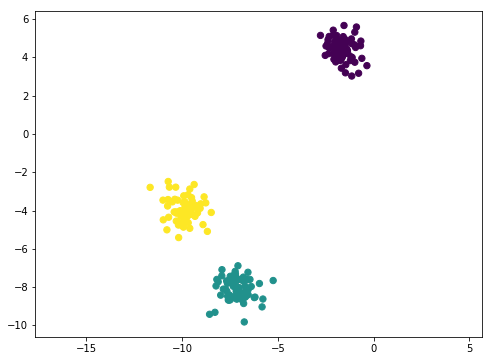

In [75]:
plt.figure(figsize=(8, 6))
ax=plt.subplot(111)
ax.axis('equal')
ax.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap='viridis');

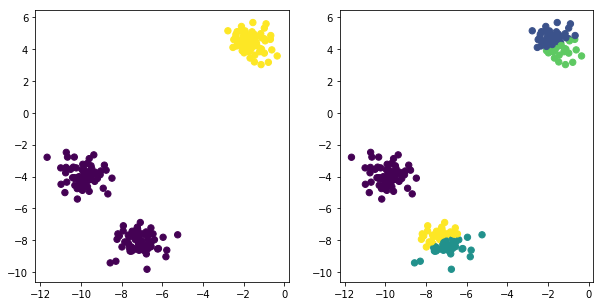

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

axes[0].scatter(X[:, 0], X[:, 1], c=assignments, s=40, cmap='viridis');

# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

axes[1].scatter(X[:, 0], X[:, 1], c=assignments, s=40, cmap='viridis');
plt.show()

Text(0,0.5,'Feature 1')

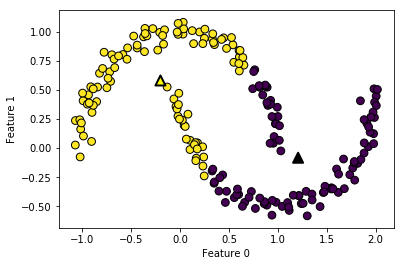

In [77]:
# generate synthetic two_moons data 
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=['black', 'yellow'], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### GMM Clustering

In [78]:
from sklearn.mixture import GaussianMixture

# generate synthetic two-dimensional data
X, y = make_blobs(n_samples=200, centers =3, cluster_std=0.60,random_state=1)

In [96]:
gmm=GaussianMixture(n_components=3, max_iter=100, n_init=100, init_params='random', weights_init=None, means_init=None)

In [97]:
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='random', max_iter=100,
        means_init=None, n_components=3, n_init=100, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [98]:
y_pred=gmm.predict(X)

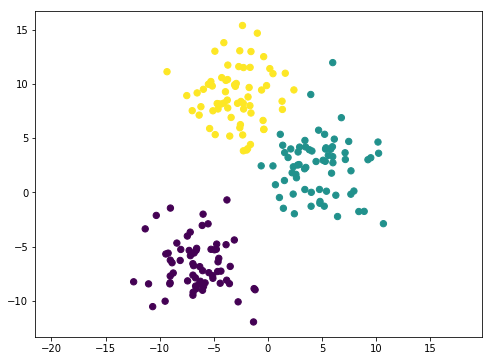

In [99]:
plt.figure(figsize=(8, 6))
ax=plt.subplot(111)
ax.axis('equal')
ax.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap='viridis');